# Data Wrangling,Analysis,and visulizations for We Rate Dogs Dataset

## Data Wrangling

## Gathering

In [56]:
import numpy as np
import pandas as pd
import requests 
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [9]:
#Tweet text maximum is 140 characters plus 3 for pandas' truncation ellipsis
pd.options.display.max_colwidth = 143

In [10]:
#import twitter archive
df_1=pd.read_csv('twitter-archive-enhanced.csv')
df_1.sample(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1794,677328882937298944,NaN,NaN,2015-12-17 03:26:04 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Derek. All the dogs adore Derek. He's a great guy. 10/10 really solid pup https://t.co/KgcsGNb61s,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677328882937298944/photo/1,10,10,Derek,None,None,None,None
322,834167344700198914,NaN,NaN,2017-02-21 22:26:07 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sunshine. She doesn't believe in personal space. Eyes pretty far apart for a dog. Has horns (whoa). 11/10 would pet with wonder htt...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/834167344700198914/photo/1,11,10,Sunshine,None,None,None,None


In [11]:
# Download programmatically predicted breeds file
predicted_breeds_url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response=requests.get(predicted_breeds_url)
with open('image_predictions.tsv','wb') as file:
    file.write(response.content)
    
df_2=pd.read_csv('image_predictions.tsv' , sep='\t')
df_2.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [12]:

consumer_key = 'YPosykPzsYw2cctTsR1974xvi'
consumer_secret = 'aIKAdGngahM2K8GqXixCTJwbTCyMtoxriBfJklGE0vOGDoFyMi'
access_token = '921441808395186176-KUYrYFNF9eop4wYXfFy8mqn0WeefOG6'
access_secret = '4ZfFjIzP8wbAeKDqzJXqiiFWoSEODYfnyW4zCtrA9ygNq'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [13]:
#tweet ids for gather additional data
tweet_ids=df_1.tweet_id.values
len(tweet_ids)

2356

In [14]:
# query the Twitter API for each tweet's JSON data
count=0
fails_dic={}
start=timer()

#save each tweet returned from JSON as new line in tweet_json.txt
with open('tweet_json.txt','w') as outfile:
    for tweet_id in tweet_ids:
        count+=1
        print(str(count) + ': ' + str(tweet_id))
        try:
            #Returns a single status specified by the ID parameter
           
            tweet = api.get_status(tweet_id, tweet_mode='extended', wait_on_rate_limit = True, wait_on_rate_limit_notify = True)
            print('success')
            json.dump(tweet._json,outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print('Fail')
            fails_dic[tweet_id]=e
            pass
end=timer()
print(end-start)
print(fails_dic) 

1: 892420643555336193
success
2: 892177421306343426
Fail
3: 891815181378084864
Fail
4: 891689557279858688
Fail
5: 891327558926688256
Fail
6: 891087950875897856
Fail
7: 890971913173991426
Fail
8: 890729181411237888
Fail
9: 890609185150312448
Fail
10: 890240255349198849
Fail
11: 890006608113172480
Fail
12: 889880896479866881
Fail
13: 889665388333682689
Fail
14: 889638837579907072
Fail
15: 889531135344209921
Fail
16: 889278841981685760
Fail
17: 888917238123831296
Fail
18: 888804989199671297
Fail
19: 888554962724278272
Fail
20: 888202515573088257
Fail
21: 888078434458587136
Fail
22: 887705289381826560
Fail
23: 887517139158093824
Fail
24: 887473957103951883
Fail
25: 887343217045368832
Fail
26: 887101392804085760
Fail
27: 886983233522544640
Fail
28: 886736880519319552
Fail
29: 886680336477933568
Fail
30: 886366144734445568
Fail
31: 886267009285017600
Fail
32: 886258384151887873
Fail
33: 886054160059072513
Fail
34: 885984800019947520
Fail
35: 885528943205470208
Fail
36: 885518971528720385
Fai

success
302: 836677758902222849
success
303: 836648853927522308
success
304: 836397794269200385
success
305: 836380477523124226
success
306: 836260088725786625
success
307: 836001077879255040
success
308: 835685285446955009
success
309: 835574547218894849
success
310: 835536468978302976
success
311: 835309094223372289
success
312: 835297930240217089
success
313: 835264098648616962
success
314: 835246439529840640
success
315: 835172783151792128
success
316: 835152434251116546
success
317: 834931633769889797
success
318: 834786237630337024
success
319: 834574053763584002
success
320: 834477809192075265
success
321: 834458053273591808
success
322: 834209720923721728
success
323: 834167344700198914
success
324: 834089966724603904
success
325: 834086379323871233
success
326: 833863086058651648
success
327: 833826103416520705
success
328: 833732339549220864
success
329: 833722901757046785
success
330: 833479644947025920
success
331: 833124694597443584
success
332: 832998151111966721
success


success
559: 803321560782307329
success
560: 803276597545603072
success
561: 802952499103731712
success
562: 802624713319034886
success
563: 802600418706604034
success
564: 802572683846291456
success
565: 802323869084381190
success
566: 802265048156610565
success
567: 802247111496568832
Fail
568: 802239329049477120
success
569: 802185808107208704
success
570: 801958328846974976
success
571: 801854953262350336
success
572: 801538201127157760
success
573: 801285448605831168
success
574: 801167903437357056
success
575: 801127390143516673
success
576: 801115127852503040
success
577: 800859414831898624
success
578: 800855607700029440
success
579: 800751577355128832
success
580: 800513324630806528
success
581: 800459316964663297
success
582: 800443802682937345
success
583: 800388270626521089
success
584: 800188575492947969
success
585: 800141422401830912
success
586: 800018252395122689
success
587: 799774291445383169
success
588: 799757965289017345
success
589: 799422933579902976
success
590

success
816: 771004394259247104
success
817: 770787852854652928
success
818: 770772759874076672
success
819: 770743923962707968
success
820: 770655142660169732
success
821: 770414278348247044
success
822: 770293558247038976
success
823: 770093767776997377
success
824: 770069151037685760
success
825: 769940425801170949
success
826: 769695466921623552
success
827: 769335591808995329
success
828: 769212283578875904
success
829: 768970937022709760
success
830: 768909767477751808
success
831: 768855141948723200
success
832: 768609597686943744
success
833: 768596291618299904
success
834: 768554158521745409
success
835: 768473857036525572
success
836: 768193404517830656
success
837: 767884188863397888
success
838: 767754930266464257
success
839: 767500508068192258
success
840: 767191397493538821
success
841: 767122157629476866
success
842: 766864461642756096
success
843: 766793450729734144
success
844: 766714921925144576
success
845: 766693177336135680
success
846: 766423258543644672
success


Rate limit reached. Sleeping for: 387
success
1070: 740365076218183684
success
1071: 740359016048689152
success
1072: 740214038584557568
success
1073: 739979191639244800
success
1074: 739932936087216128
success
1075: 739844404073074688
success
1076: 739623569819336705
success
1077: 739606147276148736
success
1078: 739544079319588864
success
1079: 739485634323156992
success
1080: 739238157791694849
success
1081: 738891149612572673
success
1082: 738885046782832640
success
1083: 738883359779196928
success
1084: 738537504001953792
success
1085: 738402415918125056
success
1086: 738184450748633089
success
1087: 738166403467907072
success
1088: 738156290900254721
success
1089: 737826014890496000
success
1090: 737800304142471168
success
1091: 737678689543020544
success
1092: 737445876994609152
success
1093: 737322739594330112
success
1094: 737310737551491075
success
1095: 736736130620620800
success
1096: 736392552031657984
success
1097: 736365877722001409
success
1098: 736225175608430592
succe

success
1318: 706593038911545345
success
1319: 706538006853918722
success
1320: 706516534877929472
success
1321: 706346369204748288
success
1322: 706310011488698368
success
1323: 706291001778950144
success
1324: 706265994973601792
success
1325: 706169069255446529
success
1326: 706166467411222528
success
1327: 706153300320784384
success
1328: 705975130514706432
success
1329: 705970349788291072
success
1330: 705898680587526145
success
1331: 705786532653883392
success
1332: 705591895322394625
success
1333: 705475953783398401
success
1334: 705442520700944385
success
1335: 705428427625635840
success
1336: 705239209544720384
success
1337: 705223444686888960
success
1338: 705102439679201280
success
1339: 705066031337840642
success
1340: 704871453724954624
success
1341: 704859558691414016
success
1342: 704847917308362754
success
1343: 704819833553219584
success
1344: 704761120771465216
success
1345: 704499785726889984
success
1346: 704491224099647488
success
1347: 704480331685040129
success
13

success
1567: 687841446767013888
success
1568: 687826841265172480
success
1569: 687818504314159109
success
1570: 687807801670897665
success
1571: 687732144991551489
success
1572: 687704180304273409
success
1573: 687664829264453632
success
1574: 687494652870668288
success
1575: 687480748861947905
success
1576: 687476254459715584
success
1577: 687460506001633280
success
1578: 687399393394311168
success
1579: 687317306314240000
success
1580: 687312378585812992
success
1581: 687127927494963200
success
1582: 687124485711986689
success
1583: 687109925361856513
success
1584: 687102708889812993
success
1585: 687096057537363968
success
1586: 686947101016735744
success
1587: 686760001961103360
success
1588: 686749460672679938
success
1589: 686730991906516992
success
1590: 686683045143953408
success
1591: 686618349602762752
success
1592: 686606069955735556
success
1593: 686394059078897668
success
1594: 686386521809772549
success
1595: 686377065986265092
success
1596: 686358356425093120
success
15

success
1816: 676613908052996102
success
1817: 676606785097199616
success
1818: 676603393314578432
success
1819: 676593408224403456
success
1820: 676590572941893632
success
1821: 676588346097852417
success
1822: 676582956622721024
success
1823: 676575501977128964
success
1824: 676533798876651520
success
1825: 676496375194980353
success
1826: 676470639084101634
success
1827: 676440007570247681
success
1828: 676430933382295552
success
1829: 676263575653122048
success
1830: 676237365392908289
success
1831: 676219687039057920
success
1832: 676215927814406144
success
1833: 676191832485810177
success
1834: 676146341966438401
success
1835: 676121918416756736
success
1836: 676101918813499392
success
1837: 676098748976615425
success
1838: 676089483918516224
success
1839: 675898130735476737
success
1840: 675891555769696257
success
1841: 675888385639251968
success
1842: 675878199931371520
success
1843: 675870721063669760
success
1844: 675853064436391936
success
1845: 675849018447167488
success
18

success
2064: 671159727754231808
success
2065: 671154572044468225
success
2066: 671151324042559489
success
2067: 671147085991960577
success
2068: 671141549288370177
success
2069: 671138694582165504
success
2070: 671134062904504320
success
2071: 671122204919246848
success
2072: 671115716440031232
success
2073: 671109016219725825
success
2074: 670995969505435648
success
2075: 670842764863651840
success
2076: 670840546554966016
success
2077: 670838202509447168
success
2078: 670833812859932673
success
2079: 670832455012716544
success
2080: 670826280409919488
success
2081: 670823764196741120
success
2082: 670822709593571328
success
2083: 670815497391357952
success
2084: 670811965569282048
success
2085: 670807719151067136
success
2086: 670804601705242624
success
2087: 670803562457407488
success
2088: 670797304698376195
success
2089: 670792680469889025
success
2090: 670789397210615808
success
2091: 670786190031921152
success
2092: 670783437142401025
success
2093: 670782429121134593
success
20

success
2313: 666776908487630848
success
2314: 666739327293083650
success
2315: 666701168228331520
success
2316: 666691418707132416
success
2317: 666649482315059201
success
2318: 666644823164719104
success
2319: 666454714377183233
success
2320: 666447344410484738
success
2321: 666437273139982337
success
2322: 666435652385423360
success
2323: 666430724426358785
success
2324: 666428276349472768
success
2325: 666421158376562688
success
2326: 666418789513326592
success
2327: 666411507551481857
success
2328: 666407126856765440
success
2329: 666396247373291520
success
2330: 666373753744588802
success
2331: 666362758909284353
success
2332: 666353288456101888
success
2333: 666345417576210432
success
2334: 666337882303524864
success
2335: 666293911632134144
success
2336: 666287406224695296
success
2337: 666273097616637952
success
2338: 666268910803644416
success
2339: 666104133288665088
success
2340: 666102155909144576
success
2341: 666099513787052032
success
2342: 666094000022159362
success
23

In [15]:
# save retweet and favourite for each tweet in new dataframe
df_3=pd.DataFrame(columns=['tweet_id','retweet_count','favorite_count'])
with open('tweet_json.txt') as f:
    for line in f:
        status = json.loads(line)
        tweet_id=status['id_str']
        retweet_count=status['retweet_count']
        favorite_count=status['favorite_count']
        df_3=df_3.append(pd.DataFrame([[tweet_id,retweet_count,favorite_count]],
                                      columns=['tweet_id','retweet_count','favorite_count']))

df_3=df_3.reset_index(drop=True)
df_3
        

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8691,39094
1,836753516572119041,5148,20736
2,836677758902222849,2473,13579
3,836648853927522308,615,0
4,836397794269200385,30755,0
5,836380477523124226,3282,15847
6,836260088725786625,4770,22881
7,836001077879255040,4831,20612
8,835685285446955009,9151,0
9,835574547218894849,4052,19194


## Assessing

In [16]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [17]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [18]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2054 entries, 0 to 2053
Data columns (total 3 columns):
tweet_id          2054 non-null object
retweet_count     2054 non-null object
favorite_count    2054 non-null object
dtypes: object(3)
memory usage: 48.2+ KB


In [19]:
df_1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [20]:
df_2.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [21]:
df_3.describe()

,tweet_id,retweet_count,favorite_count
count,2054,2054,2054
unique,2054,1496,1753
top,679877062409191424,309,0
freq,1,7,133


# Quality


1. df_1's id columns should be objects not integers, also timestamp  should be datetime not object
2. df_2's tweet_id column should be object not integers.
3. df_3's retweet_count and favorite_count must be int.
4. df_2's headers should be more descriptive(p1	p1_conf	p1_dog	p2	p2_conf	p2_dog	p3	p3_conf	p3_dog).
5. only want original rating and no duplicated so remove all rows with non-null retweeted_status_id, retweeted_status_user_id tweet_id	in_reply_to_status_id	in_reply_to_user_id	)
6. name	doggo	floofer	pupper	puppo in df_1 all have null.
7. df_1.name should be change from none to NAN.
8. df_1's rating numerator doesn't capture decimal. 

# Tidiness

1. doggo, floofer, pupper and puppo columns in df_1 should be one stage column
2. df_2 and df_3 are part of the same observations of df_1 but into 3 seperate tables so we can merge them 

# Clean

In [25]:
#Make copies of original data
df_1_clean=df_1.copy()
df_2_clean=df_2.copy()
df_3_clean=df_3.copy()


### Quality issue 1


### Define

change the type of all five id columns in df_1 from int to string

### code

In [26]:
df_1_clean=pd.read_csv('twitter-archive-enhanced.csv',
                      dtype={'tweet_id':'object',
                             'retweeted_status_id':'object',
                             'retweeted_status_user_id':'object',
                             'in_reply_to_status_id':'object',
                             'in_reply_to_user_id':'object'},
                      parse_dates=['timestamp'])

### test

In [27]:
df_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null object
in_reply_to_user_id           78 non-null object
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null object
retweeted_status_user_id      181 non-null object
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1), 

## Quality issue 2


### Define 
change the type of tweet_id in df_2 form int to object

### Code

In [28]:
df_2_clean.tweet_id=df_2_clean.tweet_id.astype(str)

### Test

In [29]:
df_2_clean.tweet_id.describe()

count                   2075
unique                  2075
top       679877062409191424
freq                       1
Name: tweet_id, dtype: object

## Quality issue 3


### Define
change the type of df_3's retweet_count and favorite_count to int 

### Code

In [30]:
df_3_clean.retweet_count=df_3_clean.retweet_count.astype(int)
df_3_clean.favorite_count=df_3_clean.favorite_count.astype(int)

### Test

In [31]:
df_3_clean.retweet_count.dtype

dtype('int64')

In [32]:
df_3_clean.favorite_count.dtype

dtype('int64')

## Quality issue 4

### Define
df_2's headers should be more descriptive(p1	p1_conf	p1_dog	p2	p2_conf	p2_dog	p3	p3_conf	p3_dog)
Change  img_num to image_number  p1 to prediction_1, p1_conf to prediction_1_conf ,p1_dog to prediction_1_dog ,p2 to prediction_2 ,p2_conf to prediction_2_conf, p2_dog to prediction_3_dog,p3 to prediction_3, p3_conf to prediction_3_conf ,p3_dog to prediction_3_dog]

### Code

In [33]:
df_2_clean=df_2_clean.rename(columns={'img_num':'image_number',
                                     'p1':'prediction_1',
                                     'p1_conf':'prediction_1_conf',
                                     'p1_dog':'prediction_1_dog',
                                     'p2':'prediction_2',
                                     'p2_conf':'prediction_2_conf',
                                     'p2_dog':'prediction_2_dog',
                                     'p3':'prediction_3',
                                     'p3_conf':'prediction_3_conf',
                                     'p3_dog':'prediction_3_dog'})

### Test

In [34]:
df_2_clean.head(1)

,tweet_id,jpg_url,image_number,prediction_1,prediction_1_conf,prediction_1_dog,prediction_2,prediction_2_conf,prediction_2_dog,prediction_3,prediction_3_conf,prediction_3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


# Quality issue 5

### Define 
only want original rating and no duplicated so remove all rows with non-null retweeted_status_id, retweeted_status_user_id retweeted_status_timestamp

In [35]:
### Code ,'retweeted_status_user_id','retweeted_status_timestamp'

In [36]:
df_1_clean.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],
                axis=1,inplace = True)
df_1_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 ...",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZ...,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek ...","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek ...,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfA...,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9Tw...,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https...,https://twitter.com/dog_rates/status/890240255349198849/p

### Test

In [37]:
list(df_1_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

## Quailty issue 7

### Define
df_1.name should be change from none to NAN

### Code

In [38]:
df_1_clean.name.replace('None',np.nan,inplace=True)

In [39]:
### Test

In [40]:
df_1_clean.name.value_counts()

a           55
Charlie     12
Lucy        11
Oliver      11
Cooper      11
Lola        10
Tucker      10
Penny       10
Winston      9
Bo           9
Sadie        8
the          8
Buddy        7
Bailey       7
an           7
Toby         7
Daisy        7
Jax          6
Koda         6
Leo          6
Oscar        6
Milo         6
Bella        6
Dave         6
Jack         6
Scout        6
Stanley      6
Rusty        6
Larry        5
Alfie        5
            ..
Dex          1
Tango        1
Cheryl       1
Wesley       1
Ralphy       1
Rudy         1
Opie         1
Bauer        1
Al           1
Jeremy       1
Heinrich     1
Kendall      1
Crawford     1
Chef         1
Sundance     1
Sora         1
Ebby         1
Mookie       1
Ziva         1
Glenn        1
Eugene       1
Gordon       1
Jimbo        1
Kanu         1
Barney       1
Blu          1
Taz          1
Mason        1
Ike          1
Tiger        1
Name: name, Length: 956, dtype: int64

# Tidiness

## Tidiness issue 1

### Define
doggo, floofer, pupper and puppo columns in df_1 should be one stage column

### Code

In [41]:
#Firstly change the none value of each column
df_1_clean.doggo.replace('None','',inplace=True)
df_1_clean.floofer.replace('None','',inplace=True)
df_1_clean.pupper.replace('None','',inplace=True)
df_1_clean.puppo.replace('None','',inplace=True)

In [42]:
# make new column called stage
df_1_clean['stage']=df_1_clean.doggo + df_1_clean.floofer + df_1_clean.pupper + df_1_clean.puppo

In [43]:
#Then drop doggo, floofer, pupper and puppo columns
df_1_clean.drop(['doggo','floofer','pupper','puppo'],axis=1,inplace=True)

### Test

In [44]:
df_1_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
330,833124694597443584,NaN,NaN,2017-02-19 01:23:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Gidget. She's a spy pupper. Stealthy as h*ck. Must've slipped pup and got caught. 12/10 would forgive then pet https://t.co/zD97KYFaFa,"https://twitter.com/dog_rates/status/833124694597443584/photo/1,https://twitter.com/dog_rates/status/833124694597443584/photo/1,https://twi...",12,10,Gidget,pupper
740,780543529827336192,NaN,NaN,2016-09-26 23:04:13,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a perturbed super floof. 12/10 would snug so damn well https://t.co/VG095mi09Q,https://twitter.com/dog_rates/status/780543529827336192/photo/1,12,10,NaN,
1604,685906723014619143,NaN,NaN,2016-01-09 19:31:20,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Olive. He's stuck in a sleeve. 9/10 damn it Olive https://t.co/NnLjg6BgyF,"https://twitter.com/dog_rates/status/685906723014619143/photo/1,https://twitter.com/dog_rates/status/685906723014619143/photo/1",9,10,Olive,
1748,679062614270468097,NaN,NaN,2015-12-21 22:15:18,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Chompsky. He lives up to his name. 11/10 https://t.co/Xl37lQEWd0,"https://twitter.com/dog_rates/status/679062614270468097/photo/1,https://twitter.com/dog_rates/status/679062614270468097/photo/1",11,10,Chompsky,
2030,671789708968640512,NaN,NaN,2015-12-01 20:35:22,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is space pup. He's very confused. Tries to moonwalk at one point. Super spiffy uniform. 13/10 I love space pup https://t.co/SfPQ2KeLdq,https://twitter.com/dog_rates/status/671789708968640512/photo/1,13,10,space,


In [45]:
df_1_clean.stage.value_counts()

                1976
pupper           245
doggo             83
puppo             29
doggopupper       12
floofer            9
doggofloofer       1
doggopuppo         1
Name: stage, dtype: int64

## Quality issue 8

## Tidiness issue 1

### Define
rating numerator and rating denominator should be floats 

### Code

In [46]:
rating=df_1_clean.text.str.extract('((?:\+d+\.)?\d+)\/(\d+)',expand=True)
rating.columns=['rating_numerator','rating_denominator']

df_1_clean['rating_numerator']=rating['rating_numerator'].astype(float)
df_1_clean['rating_denominator']=rating['rating_denominator'].astype(float)

### Test

In [47]:
df_1_clean.rating_numerator.value_counts()

12.0      558
11.0      464
10.0      461
13.0      351
9.0       158
8.0       102
7.0        55
14.0       54
5.0        37
6.0        32
3.0        19
4.0        17
1.0         9
2.0         9
75.0        2
15.0        2
420.0       2
0.0         2
144.0       1
666.0       1
121.0       1
182.0       1
165.0       1
17.0        1
45.0        1
204.0       1
960.0       1
1776.0      1
84.0        1
24.0        1
27.0        1
88.0        1
99.0        1
50.0        1
80.0        1
60.0        1
44.0        1
20.0        1
26.0        1
143.0       1
Name: rating_numerator, dtype: int64

### Define
merge the three tables on tweet_id


### Code

In [48]:
#df_clean=df_1_clean.append(df_3_clean)
#df_clean.tweet_id
df_clean=pd.merge(df_1_clean,df_3_clean,on=['tweet_id'],how='inner')
df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,,8691,39094
1,836753516572119041,NaN,NaN,2017-03-01 01:42:39,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Meera. She just heard about taxes and how much a doghouse in a nice area costs. Not pupared to be a doggo anymore. 12/10 https://t...,https://twitter.com/dog_rates/status/836753516572119041/photo/1,12.0,10.0,Meera,doggo,5148,20736
2,836677758902222849,NaN,NaN,2017-02-28 20:41:37,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Oliver. He's pretty exotic. Fairly pupset as well. Too many midterms coming pup. 11/10 would pet with extreme caution https://...,"https://twitter.com/dog_rates/status/836677758902222849/photo/1,https://twitter.com/dog_rates/status/836677758902222849/photo/1",11.0,10.0,Oliver,,2473,13579
3,836648853927522308,NaN,NaN,2017-02-28 18:46:45,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @SchafeBacon2016: @dog_rates Slightly disturbed by the outright profanity, but confident doggos were involved. 11/10, would tailgate aga…",https://twitter.com/SchafeBacon2016/status/836648149003485187/photo/1,11.0,10.0,NaN,,615,0
4,836397794269200385,NaN,NaN,2017-02-28 02:09:08,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Buddy. He ran into a glass door once. Now he's h*ckin skeptical. 13/10 empowering af (vid by Brittany Gaunt) https:/…,https://twitter.com/dog_rates/status/817827839487737858/video/1,13.0,10.0,Buddy,,30755,0


In [49]:
df_clean=pd.merge(df_clean,df_2_clean,on='tweet_id',how='inner')
df_clean.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,image_number,prediction_1,prediction_1_conf,prediction_1_dog,prediction_2,prediction_2_conf,prediction_2_dog,prediction_3,prediction_3_conf,prediction_3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,836753516572119041,NaN,NaN,2017-03-01 01:42:39,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Meera. She just heard about taxes and how much a doghouse in a nice area costs. Not pupared to be a doggo anymore. 12/10 https://t...,https://twitter.com/dog_rates/status/836753516572119041/photo/1,12.0,10.0,Meera,...,1,mortarboard,0.936882,False,academic_gown,0.020815,False,schipperke,0.011564,True
2,836677758902222849,NaN,NaN,2017-02-28 20:41:37,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Oliver. He's pretty exotic. Fairly pupset as well. Too many midterms coming pup. 11/10 would pet with extreme caution https://...,"https://twitter.com/dog_rates/status/836677758902222849/photo/1,https://twitter.com/dog_rates/status/836677758902222849/photo/1",11.0,10.0,Oliver,...,2,leopard,0.797410,False,jaguar,0.095487,False,snow_leopard,0.079694,False
3,836380477523124226,NaN,NaN,2017-02-28 01:00:19,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Ava. She just blasted off. Streamline af. Aerodynamic as h*ck. One small step for pupper, one giant leap for pupkind. 12/10 https:/...",https://twitter.com/dog_rates/status/836380477523124226/photo/1,12.0,10.0,Ava,...,1,wooden_spoon,0.082489,False,sliding_door,0.061017,False,grand_piano,0.055086,False
4,836260088725786625,NaN,NaN,2017-02-27 17:01:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Lucy. She spent all morning overseeing the shoveling of the driveway. H*ckin hard work. 13/10 very good girl Lucy https://t.co/gA2G...,https://twitter.com/dog_rates/status/836260088725786625/photo/1,13.0,10.0,Lucy,...,1,borzoi,0.564688,True,ice_bear,0.078267,False,Pembroke,0.057916,True


# Store

In [50]:
df_clean.to_csv('twitter_archive_master.csv',index=False)

# Analysis and visualization

In [51]:
#Highest Five rating
df_clean.sort_values('rating_numerator',ascending=False).head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,image_number,prediction_1,prediction_1_conf,prediction_1_dog,prediction_2,prediction_2_conf,prediction_2_dog,prediction_3,prediction_3_conf,prediction_3_dog
563,749981277374128128,NaN,NaN,2016-07-04 15:00:45,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,https://twitter.com/dog_rates/status/749981277374128128/photo/1,1776.0,10.0,Atticus,...,1,bow_tie,0.533941,False,sunglasses,0.080822,False,sunglass,0.050776,False
1556,670842764863651840,NaN,NaN,2015-11-29 05:52:33,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,https://twitter.com/dog_rates/status/670842764863651840/photo/1,420.0,10.0,NaN,...,1,microphone,0.096063,False,accordion,0.094075,False,drumstick,0.061113,False
685,731156023742988288,NaN,NaN,2016-05-13 16:15:54,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204.0,170.0,this,...,1,lakeside,0.501767,False,breakwater,0.051351,False,king_penguin,0.049444,False
495,758467244762497024,NaN,NaN,2016-07-28 01:00:57,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,https://twitter.com/dog_rates/status/758467244762497024/video/1,165.0,150.0,NaN,...,1,Labrador_retriever,0.436377,True,Chihuahua,0.113956,True,American_Staffordshire_terrier,0.099689,True
1273,677716515794329600,NaN,NaN,2015-12-18 05:06:23,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq,https://twitter.com/dog_rates/status/677716515794329600/photo/1,144.0,120.0,NaN,...,1,teddy,0.662908,False,crib,0.031891,False,chow,0.025438,True


In [244]:
#Highest Five favourite count
df_clean.sort_values('favorite_count',ascending=False).head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,image_number,prediction_1,prediction_1_conf,prediction_1_dog,prediction_2,prediction_2_conf,prediction_2_dog,prediction_3,prediction_3_conf,prediction_3_dog
325,822872901745569793,NaN,NaN,2017-01-21 18:26:02,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a super supportive puppo participating in the Toronto #WomensMarch today. 13/10 https://t.co/nTz3FtorBc,https://twitter.com/dog_rates/status/822872901745569793/photo/1,13.0,10.0,NaN,...,1,Lakeland_terrier,0.196015,True,Labrador_retriever,0.160329,True,Irish_terrier,0.069126,True
111,866450705531457537,NaN,NaN,2017-05-22 00:28:40,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Jamesy. He gives a kiss to every other pupper he sees on his walk. 13/10 such passion, much tender https://t.co/wk7TfysWHr","https://twitter.com/dog_rates/status/866450705531457537/photo/1,https://twitter.com/dog_rates/status/866450705531457537/photo/1",13.0,10.0,Jamesy,...,2,French_bulldog,0.905334,True,Boston_bull,0.078060,True,pug,0.001771,True
428,807106840509214720,NaN,NaN,2016-12-09 06:17:20,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Stephan. He just wants to help. 13/10 such a good boy https://t.co/DkBYaCAg2d,https://twitter.com/dog_rates/status/807106840509214720/video/1,13.0,10.0,Stephan,...,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
59,879415818425184262,NaN,NaN,2017-06-26 19:07:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Duddles. He did an attempt. 13/10 someone help him (vid by Georgia Felici) https://t.co/UDT7ZkcTgY,https://twitter.com/dog_rates/status/879415818425184262/video/1,13.0,10.0,Duddles,...,1,English_springer,0.383404,True,Boston_bull,0.134967,True,Cardigan,0.110481,True
354,819004803107983360,NaN,NaN,2017-01-11 02:15:36,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bo. He was a very good First Doggo. 14/10 would be an absolute honor to pet https://t.co/AdPKrI8BZ1,"https://twitter.com/dog_rates/status/819004803107983360/photo/1,https://twitter.com/dog_rates/status/819004803107983360/photo/1,https://twi...",14.0,10.0,Bo,...,1,standard_poodle,0.351308,True,toy_poodle,0.271929,True,Tibetan_terrier,0.094759,True


In [52]:
#Highest Five retweet count
df_clean.sort_values('retweet_count',ascending=False).head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,image_number,prediction_1,prediction_1_conf,prediction_1_dog,prediction_2,prediction_2_conf,prediction_2_dog,prediction_3,prediction_3_conf,prediction_3_dog
612,744234799360020481,NaN,NaN,2016-06-18 18:26:18,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,https://twitter.com/dog_rates/status/744234799360020481/video/1,13.0,10.0,NaN,...,1,Labrador_retriever,0.825333,True,ice_bear,0.044681,False,whippet,0.018442,True
193,807106840509214720,NaN,NaN,2016-12-09 06:17:20,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Stephan. He just wants to help. 13/10 such a good boy https://t.co/DkBYaCAg2d,https://twitter.com/dog_rates/status/807106840509214720/video/1,13.0,10.0,Stephan,...,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
647,739238157791694849,NaN,NaN,2016-06-04 23:31:25,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a doggo blowing bubbles. It's downright legendary. 13/10 would watch on repeat forever (vid by Kent Duryee) https://t.co/YcXgHfp1EC,https://twitter.com/dog_rates/status/739238157791694849/video/1,13.0,10.0,NaN,...,1,Eskimo_dog,0.503372,True,Siberian_husky,0.390413,True,malamute,0.080901,True
90,822872901745569793,NaN,NaN,2017-01-21 18:26:02,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a super supportive puppo participating in the Toronto #WomensMarch today. 13/10 https://t.co/nTz3FtorBc,https://twitter.com/dog_rates/status/822872901745569793/photo/1,13.0,10.0,NaN,...,1,Lakeland_terrier,0.196015,True,Labrador_retriever,0.160329,True,Irish_terrier,0.069126,True
116,819015337530290176,NaN,NaN,2017-01-11 02:57:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Bo. He was a very good First Doggo. 14/10 would be an absolute honor to pet https://t.co/AdPKrI8BZ1,"https://twitter.com/dog_rates/status/819004803107983360/photo/1,https://twitter.com/dog_rates/status/819004803107983360/photo/1,https://twi...",14.0,10.0,Bo,...,1,standard_poodle,0.351308,True,toy_poodle,0.271929,True,Tibetan_terrier,0.094759,True


In [53]:


df_clean['prediction_1'].value_counts()/len(df_clean) * 100


golden_retriever             7.088332
Labrador_retriever           4.525627
Chihuahua                    3.925845
Pembroke                     3.816794
pug                          2.835333
toy_poodle                   2.126499
chow                         2.071974
Pomeranian                   2.017448
Samoyed                      1.962923
cocker_spaniel               1.526718
malamute                     1.472192
seat_belt                    1.199564
miniature_pinscher           1.145038
Chesapeake_Bay_retriever     1.035987
Maltese_dog                  0.981461
teddy                        0.981461
beagle                       0.981461
German_shepherd              0.926936
Shih-Tzu                     0.926936
Rottweiler                   0.926936
Siberian_husky               0.926936
French_bulldog               0.872410
Lakeland_terrier             0.872410
Staffordshire_bullterrier    0.872410
Eskimo_dog                   0.817884
kuvasz                       0.817884
Shetland_she

Most dogs don't have a dog 'stage' (84%)

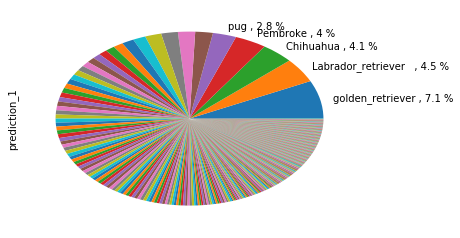

In [54]:
labels=np.full(len(df_clean),'',dtype=object)
labels[0]="golden_retriever , 7.1 %"
labels[1]="Labrador_retriever   , 4.5 %"
labels[2]="Chihuahua , 4.1 %"
labels[3]="Pembroke , 4 %"
labels[4]="pug , 2.8 %"
df_clean.prediction_1.value_counts().plot(kind='pie',labels=labels)


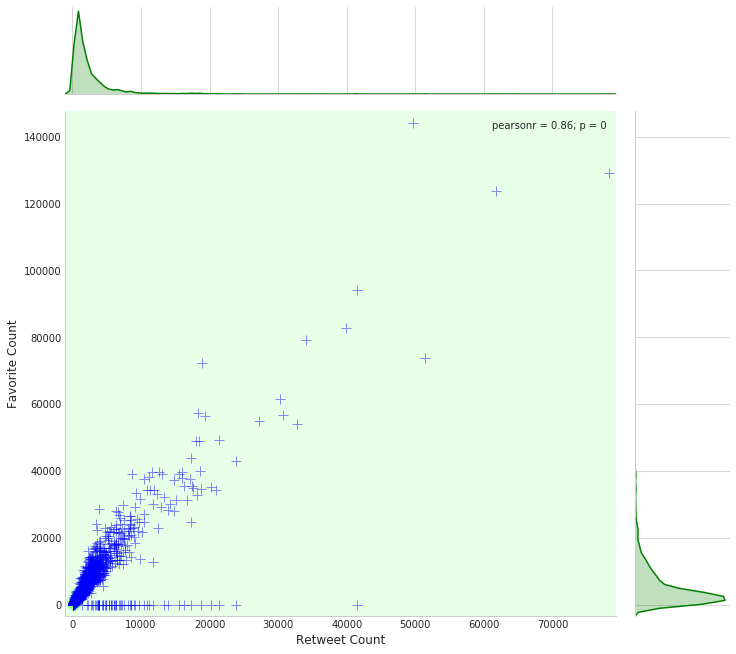

In [62]:
#Visualization comparing the favorite & retweet counts

g = sns.jointplot(x="retweet_count", y="favorite_count", data=df_clean, color="green",kind="kde", size=10)
g.plot_joint(plt.scatter,  c="blue",s=90, linewidth=1, marker="+",alpha=0.45)
g.set_axis_labels("Retweet Count", "Favorite Count",fontsize=12)
g.fig.subplots_adjust(top=0.9)

we notice that there is a strong correlation between the retweet count and favourite count where r is about 0.92 